In [2]:
### TODO Please provide your Cloudant credentials here by creating a connection to Cloudant and insert the code
### Please have a look at the latest video "Connect to Cloudant/CouchDB from ApacheSpark in Watson Studio" on https://www.youtube.com/c/RomeoKienzler
database = "washing" #as long as you didn't change this in the NodeRED flow the database name stays the same

#Please don't modify this function
def readDataFrameFromCloudant(database):
    cloudantdata=spark.read.load(database, "com.cloudant.spark")

    cloudantdata.createOrReplaceTempView("washing")
    spark.sql("SELECT * from washing").show()
    return cloudantdata

spark = SparkSession\
    .builder\
    .appName("Cloudant Spark SQL Example in Python using temp tables")\
    .config("cloudant.host",'30f921e4-f168-4257-a4e8-9c60217cae5e-bluemix.cloudant.com')\
    .config("cloudant.username", '30f921e4-f168-4257-a4e8-9c60217cae5e-bluemix')\
    .config("cloudant.password",'aecc49c41f48d3c2147e5c875a665a85af5dc8bf540fd4b9d63733f3c1b2c021')\
    .config("jsonstore.rdd.partitions", 1)\
.getOrCreate()

In [3]:
df=readDataFrameFromCloudant('office_temp')
df.show()

+--------------------+--------------------+-----+--------+-----------+
|                 _id|                _rev|class|humidity|temperature|
+--------------------+--------------------+-----+--------+-----------+
|08ca6954e19c68999...|1-fd1d0521473f3df...|    2|    35.9|       22.9|
|08ca6954e19c68999...|1-2dc90cfca1592f7...|    2|    35.8|       22.9|
|08ca6954e19c68999...|1-ef3e0c20f031f5a...|    2|    35.6|       22.9|
|08ca6954e19c68999...|1-4ca8b47dcf5f048...|    2|    35.3|       22.9|
|08ca6954e19c68999...|1-1b9ea6f18bc72e3...|    2|    35.4|       22.9|
|08ca6954e19c68999...|1-4ca8b47dcf5f048...|    2|    35.3|       22.9|
|08ca6954e19c68999...|1-4ca8b47dcf5f048...|    2|    35.3|       22.9|
|08ca6954e19c68999...|1-4ca8b47dcf5f048...|    2|    35.3|       22.9|
|08ca6954e19c68999...|1-4ca8b47dcf5f048...|    2|    35.3|       22.9|
|08ca6954e19c68999...|1-4ca8b47dcf5f048...|    2|    35.3|       22.9|
|08ca6954e19c68999...|1-9bacd30305f837d...|    2|    35.2|       22.9|
|08ca6

In [5]:
from pyspark.sql import functions as F
df = df.withColumn("index",F.monotonically_increasing_id())

DataFrame[_id: string, _rev: string, class: bigint, humidity: double, temperature: double]

In [6]:
df.createOrReplaceTempView('df')

In [8]:
df_class_0 = spark.sql('select index, temperature as temperature_0,humidity as humidity_0 from df where class = 0')
df_class_1 = spark.sql('select index, temperature as temperature_1,humidity as humidity_1 from df where class = 1')
df_class_2 = spark.sql('select index, temperature as temperature_2,humidity as humidity_2 from df where class = 2')

In [9]:
df_class_0.createOrReplaceTempView('df_class_0')
df_class_1.createOrReplaceTempView('df_class_1')
df_class_2.createOrReplaceTempView('df_class_2')

In [10]:
spark.sql('select * from df_class_0 inner join df_class_1 on df_class_0.index = df_class_1.index').show()

+-----+-------------+----------+-----+-------------+----------+
|index|temperature_0|humidity_0|index|temperature_1|humidity_1|
+-----+-------------+----------+-----+-------------+----------+
+-----+-------------+----------+-----+-------------+----------+



In [11]:
#df_class_1.select('class').distinct().show()
df_class_1.printSchema()

root
 |-- index: long (nullable = false)
 |-- temperature_1: double (nullable = true)
 |-- humidity_1: double (nullable = true)



In [12]:
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table SPARK_PACKAGES created successfully
Table USER_PREFERENCES created successfully
Table service_connections created successfully


In [13]:
display(df_class_0)


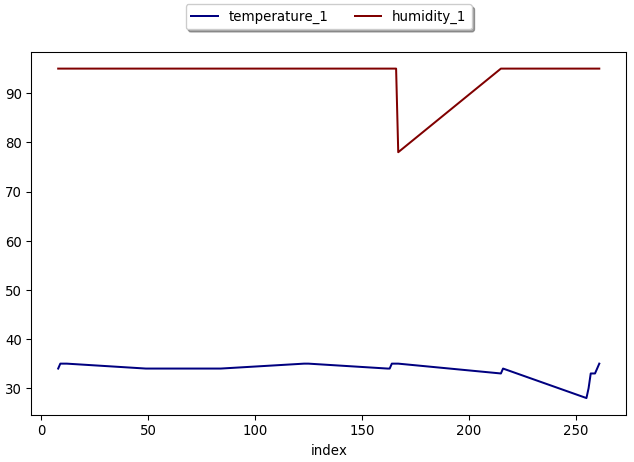

In [18]:
display(df_class_1)


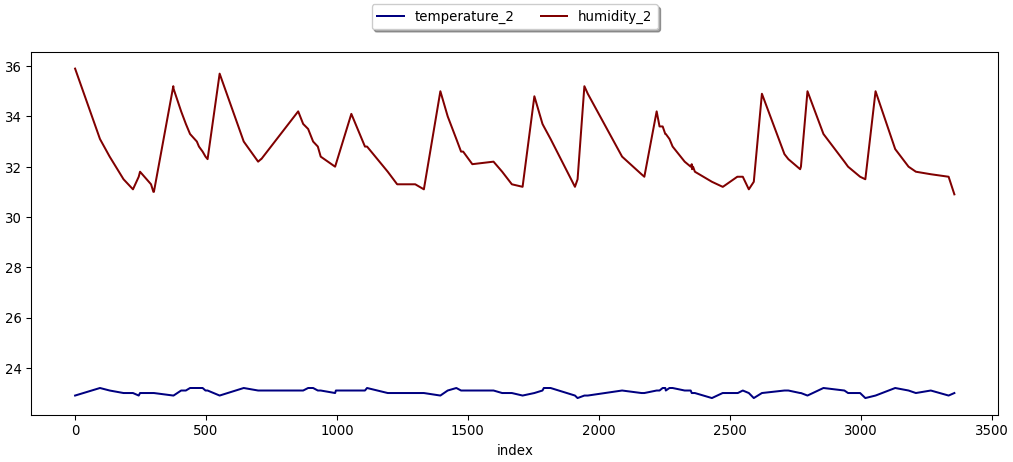

In [14]:
display(df_class_2)

In [21]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import Normalizer



vectorAssembler = VectorAssembler(inputCols=["humidity","temperature"],
                                  outputCol="features")

normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)

In [22]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[vectorAssembler, normalizer])